# 2702213770 / Laurel Evelina Widjaja
**Dataset B - Hotel**

## Pre-Processing

### Import libraries

In [79]:
import pandas as pd
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
import statistics as st
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import joblib

### Read the dataset

In [41]:
df = pd.read_csv("Dataset_B_hotel.csv")
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0.0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0.0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0.0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0.0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0.0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0.0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0.0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0.0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0.0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


### Mendapat informasi tentang dataset


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     35368 non-null  object 
 6   required_car_parking_space            35005 non-null  float64
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

Terdapat 19 kolom dan 36275 baris data. Terdapat missing value di kolom type_of_meal_plan, required_car_parking_space, dan avg_price_per_room

### Mengetahui jumlah data di masing-masing kelas


In [43]:
df['booking_status'].value_counts()

booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64

Distribusi data tidak terlalu merata. Kelas Not_Canceled memiliki dua kali lipat data (24390) dibanding dengan Canceled (11885).

### Split dataset menjadi 80% data train dan 20% data test

In [44]:
# Mendefinisikan variabel x (input) dan y (output)
x = df.drop(['Booking_ID', 'booking_status'], axis=1)
y = df['booking_status']

Kolom Booking_ID tidak dijadikan sebagai input karena merupakan identifier.

In [45]:
# Split dataset menjadi train dan test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(29020, 17)
(29020,)
(7255, 17)
(7255,)


Data dibagi menjadi 80% data train dan 20% data test.\
Split dilakukan di awal sebelum masuk ke tahap pre-processing agar data test tidak terkontaminasi oleh informasi dari data train sehingga hasil evaluasi model dapat lebih objektif dan akurat.

### Handle missing values

#### Cek jumlah missing values

In [46]:
x_train.isna().sum()

no_of_adults                               0
no_of_children                             0
no_of_weekend_nights                       0
no_of_week_nights                          0
type_of_meal_plan                        736
required_car_parking_space              1039
room_type_reserved                         0
lead_time                                  0
arrival_year                               0
arrival_month                              0
arrival_date                               0
market_segment_type                        0
repeated_guest                             0
no_of_previous_cancellations               0
no_of_previous_bookings_not_canceled       0
avg_price_per_room                      1279
no_of_special_requests                     0
dtype: int64

In [47]:
x_test.isna().sum()

no_of_adults                              0
no_of_children                            0
no_of_weekend_nights                      0
no_of_week_nights                         0
type_of_meal_plan                       171
required_car_parking_space              231
room_type_reserved                        0
lead_time                                 0
arrival_year                              0
arrival_month                             0
arrival_date                              0
market_segment_type                       0
repeated_guest                            0
no_of_previous_cancellations              0
no_of_previous_bookings_not_canceled      0
avg_price_per_room                      353
no_of_special_requests                    0
dtype: int64

#### Cek persentase missing values

In [48]:
x_train['type_of_meal_plan'].isna().sum() / len(x_train) * 100

np.float64(2.53618194348725)

In [49]:
x_train['required_car_parking_space'].isna().sum() / len(x_train) * 100

np.float64(3.5802894555478977)

In [50]:
x_train['avg_price_per_room'].isna().sum() / len(x_train) * 100

np.float64(4.407305306685045)

Karena jumlah missing value dari masing-masing kolom terbilang kecil (2.5% untuk type_of_meal_plan, 3.6% untuk required_car_parking_space, dan 4.4% untuk avg_price_per_room), maka akan dilakukan impute missing value.

#### Imputasi missing values di type_of_meal_plan

Missing value diisi dengan nilai modus, yakni 'Meal Plan 1', karena type_of_meal_plan merupakan kolom kategorikal.

In [51]:
print(st.mode(x_train['type_of_meal_plan']))

Meal Plan 1


In [52]:
x_train['type_of_meal_plan'].fillna('Meal Plan 1', inplace=True)
x_test['type_of_meal_plan'].fillna('Meal Plan 1', inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_30776\4095426347.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x_train['type_of_meal_plan'].fillna('Meal Plan 1', inplace=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_30776\4095426347.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

#### Imputasi missing values di required_car_parking_space

Missing value diisi dengan nilai modus, yakni 0.0, karena required_car_parking_space merupakan kolom kategorikal.

In [53]:
print(st.mode(x_train['required_car_parking_space']))

0.0


In [54]:
x_train['required_car_parking_space'].fillna(0.0, inplace=True)
x_test['required_car_parking_space'].fillna(0.0, inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_30776\1737742646.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x_train['required_car_parking_space'].fillna(0.0, inplace=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_30776\1737742646.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

#### Imputasi missing values di avg_price_per_room

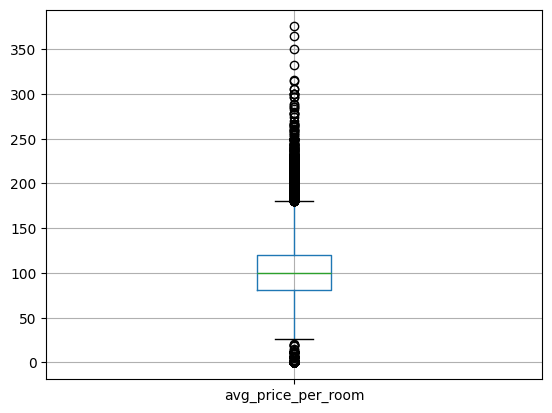

In [55]:
x_train.boxplot(column=['avg_price_per_room'])
plt.show()

Karena terdapar outliers, maka missing value akan diimputasi menggunakan nilai median karena memiliki tingkat ketahanan yang lebih tinggi.

In [56]:
median_avg_price_per_room = x_train['avg_price_per_room'].median()
print('Median dari avg_price_per_room:', median_avg_price_per_room)

Median dari avg_price_per_room: 99.9


In [57]:
x_train['avg_price_per_room'].fillna(median_avg_price_per_room, inplace=True)
x_test['avg_price_per_room'].fillna(median_avg_price_per_room, inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_30776\2225308425.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x_train['avg_price_per_room'].fillna(median_avg_price_per_room, inplace=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_30776\2225308425.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

In [58]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29020 entries, 25629 to 15795
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          29020 non-null  int64  
 1   no_of_children                        29020 non-null  int64  
 2   no_of_weekend_nights                  29020 non-null  int64  
 3   no_of_week_nights                     29020 non-null  int64  
 4   type_of_meal_plan                     29020 non-null  object 
 5   required_car_parking_space            29020 non-null  float64
 6   room_type_reserved                    29020 non-null  object 
 7   lead_time                             29020 non-null  int64  
 8   arrival_year                          29020 non-null  int64  
 9   arrival_month                         29020 non-null  int64  
 10  arrival_date                          29020 non-null  int64  
 11  market_segment_t

Sudah tidak ada missing value lagi di dataset

### Drop Duplicated Rows

In [59]:
x_train.duplicated().sum()

np.int64(7346)

Terdapat 7346 data yang merupakan duplikat sehingga akan di drop

In [60]:
# Pastikan y_train dan y_test jadi Series
y_train = pd.Series(y_train, name='booking_status')
y_test = pd.Series(y_test, name='booking_status')

# Gabungkan sementara
train_combined = pd.concat([x_train, y_train], axis=1)
test_combined = pd.concat([x_test, y_test], axis=1)

# Drop duplicates
train_combined = train_combined.drop_duplicates().reset_index(drop=True)
test_combined = test_combined.drop_duplicates().reset_index(drop=True)

# Pisahkan kembali
x_train = train_combined.drop(columns=y_train.name)
y_train = train_combined[y_train.name]

x_test = test_combined.drop(columns=y_test.name)
y_test = test_combined[y_test.name]

### Cek anomali pada data

In [61]:
x_train[x_train['no_of_adults'] == 0]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
57,0,2,2,2,Meal Plan 1,0.0,Room_Type 2,87,2018,5,29,Online,0,0,0,112.01,1
371,0,2,1,2,Meal Plan 1,0.0,Room_Type 2,37,2018,2,12,Online,0,0,0,69.50,1
747,0,2,0,2,Meal Plan 1,0.0,Room_Type 2,12,2017,12,24,Online,0,0,0,77.25,1
886,0,2,0,3,Meal Plan 1,0.0,Room_Type 2,40,2018,1,14,Online,0,0,0,6.00,1
941,0,2,2,4,Meal Plan 1,0.0,Room_Type 2,236,2018,7,28,Online,0,0,0,6.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21096,0,2,2,2,Meal Plan 1,0.0,Room_Type 2,115,2018,6,26,Online,0,0,0,92.12,0
21198,0,2,1,3,Meal Plan 1,0.0,Room_Type 2,48,2017,10,19,Online,0,0,0,6.00,1
21328,0,2,2,3,Meal Plan 1,0.0,Room_Type 2,216,2018,10,23,Online,0,0,0,83.83,3
21541,0,2,1,1,Meal Plan 1,0.0,Room_Type 7,14,2018,8,13,Online,0,0,0,0.00,1


In [62]:
len(x_train[x_train['no_of_adults'] == 0])

113

Terdapat 113 data dengan nilai no_of_adults atau jumlah orang dewasa sama dengan nol. Hal ini kemungkinan merupakan kesalahan input data, karena dalam konteks pemesanan hotel, sangat kecil kemungkinan anak-anak melakukan reservasi tanpa didampingi orang dewasa. Oleh karena itu, data ini akan di-drop demi menjaga kualitas dan validitas analisis.

In [63]:
# Gabungkan sementara
train_combined = pd.concat([x_train, y_train], axis=1)
test_combined = pd.concat([x_test, y_test], axis=1)

# Drop duplicates
train_combined = train_combined[train_combined['no_of_adults'] > 0]
test_combined = test_combined[test_combined['no_of_adults'] > 0]

# Pisahkan kembali
x_train = train_combined.drop(columns=y_train.name)
y_train = train_combined[y_train.name]

x_test = test_combined.drop(columns=y_test.name)
y_test = test_combined[y_test.name]

### Categorical feature encoding

In [64]:
categorical_columns = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']

for i in categorical_columns:
    print(df[i].value_counts(), "\n")

type_of_meal_plan
Meal Plan 1     27157
Not Selected     4986
Meal Plan 2      3220
Meal Plan 3         5
Name: count, dtype: int64 

room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64 

market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64 

booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64 



#### Encoding room_type_reserved

Encoding room_type_reserved menggunakan Label Encoder karena unique value nya terdiri dari Room_Type 1 hingga Room_Type 7 (kategori berurutan yang jumlahnya terbatas) serta lebih hemat fitur dibandingkan jika menggunakan One Hot Encoder

In [65]:
rtr_enc = LabelEncoder()
x_train['room_type_reserved'] = rtr_enc.fit_transform(x_train['room_type_reserved'])
x_test['room_type_reserved'] = rtr_enc.transform(x_test['room_type_reserved'])

In [66]:
rtr_encoder_file = 'room_type_reserved_encode.pkl'
pkl.dump(rtr_enc, open(rtr_encoder_file, 'wb'))

#### Encoding booking_status

Encoding booking_status menggunakan Label Encoder karena nilainya meupakan binary (Canceled dan Not_Canceled)

In [67]:
bs_enc = LabelEncoder()
y_train = bs_enc.fit_transform(y_train)
y_test2 = bs_enc.transform(y_test)

In [68]:
bs_encoder_file = 'booking_status_encode.pkl'
pkl.dump(bs_enc, open(bs_encoder_file, 'wb'))

#### Encoding market_segment_type dan type_of_meal_plan

Encoding market_segment_type dan type_of_meal_plan menggunakan One Hot Encoder karena kedua fitur tersebut tidak memiliki urutan atau hierarki antar kategorinya sehingga penggunaan One Hot Encoder dapat mencegah model membuat asumsi hubungan matematis antar nilai. One Hot Encoder juga membantu model membedakan setiap kategori dengan jelas tanpa memberi bobot lebih pada salah satu value.

In [69]:
# Copy original x_train dan x_test
x_train_copy = x_train.copy()
x_test_copy = x_test.copy()

# One Hot Encoding untuk market_segment_type
mst_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
mst_train = pd.DataFrame(mst_encoder.fit_transform(x_train_copy[['market_segment_type']]),
                        columns=mst_encoder.get_feature_names_out(['market_segment_type']))
mst_test = pd.DataFrame(mst_encoder.transform(x_test_copy[['market_segment_type']]),
                        columns=mst_encoder.get_feature_names_out(['market_segment_type']))

# One Hot Encoding untuk type_of_meal_plan
tmp_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
tmp_train = pd.DataFrame(tmp_encoder.fit_transform(x_train_copy[['type_of_meal_plan']]),
                        columns=tmp_encoder.get_feature_names_out(['type_of_meal_plan']))
tmp_test = pd.DataFrame(tmp_encoder.transform(x_test_copy[['type_of_meal_plan']]),
                        columns=tmp_encoder.get_feature_names_out(['type_of_meal_plan']))

# Gabungkan semua encoding ke x_train dan x_test
x_train = pd.concat([x_train_copy.reset_index(drop=True), mst_train, tmp_train], axis=1)
x_test = pd.concat([x_test_copy.reset_index(drop=True), mst_test, tmp_test], axis=1)

# Drop kolom original yang sudah di-encode
x_train.drop(['market_segment_type', 'type_of_meal_plan'], axis=1, inplace=True)
x_test.drop(['market_segment_type', 'type_of_meal_plan'], axis=1, inplace=True)


In [70]:
onehot_enc_mst = 'oneHot_encode_mst.pkl'
pkl.dump(mst_encoder, open(onehot_enc_mst, 'wb'))

onehot_enc_tmp = 'oneHot_encode_tmp.pkl'
pkl.dump(tmp_encoder, open(onehot_enc_tmp, 'wb'))

## Modelling

### Random Forest

Training model Random Forest dengan menggunakan random_state = 42.

In [71]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

Melakukan prediksi dan inverse transform dari hasil prediksi menggunakan model Random Forest

In [72]:
y_predict_rf = rf_model.predict(x_test)
y_predict_rf2 = bs_enc.inverse_transform(y_predict_rf)

Melakukan evaluasi terhadap model Random Forest

In [73]:
print('\nClassification Report of Random Forest Model\n')
print(classification_report(y_test, y_predict_rf2))


Classification Report of Random Forest Model

              precision    recall  f1-score   support

    Canceled       0.84      0.78      0.81      1876
Not_Canceled       0.90      0.94      0.92      4231

    accuracy                           0.89      6107
   macro avg       0.87      0.86      0.86      6107
weighted avg       0.89      0.89      0.89      6107



Model memiliki akurasi sebesar 89%, yang artinya model dapat memprediksi dengan benar 89% dari 6107 data. Kelas Canceled memiliki precision, recall, dan f1-score yang lebih rendah dibandingkan kelas Not_Canceled. Hal ini kemungkinan dapat terjadi karena dataset yang tidak seimbang atau imbalance. 
Macro Average yang menunjukkan rata-rata kinerja per kelas, yakni sebesar 0.86. Hal ini mengindikasikan keseimbangan yang cukup meski ada gap antara dua kelas.

### XGBoost

Melakukan training model XGBoost

In [74]:
xgb_model = XGBClassifier()
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Melakukan prediksi dengan menggunakan model XGBoost

In [75]:
y_predict_xgb = xgb_model.predict(x_test)
y_predict_xgb2 = bs_enc.inverse_transform(y_predict_xgb)

Menampilkan evaluasi dari model XGBoost

In [76]:
print('\nClassification Report of XGBoost Model\n')
print(classification_report(y_test, y_predict_xgb2))


Classification Report of XGBoost Model

              precision    recall  f1-score   support

    Canceled       0.81      0.74      0.77      1876
Not_Canceled       0.89      0.93      0.91      4231

    accuracy                           0.87      6107
   macro avg       0.85      0.83      0.84      6107
weighted avg       0.87      0.87      0.87      6107



Model memiliki akurasi sebesar 87%, yang artinya model dapat memprediksi dengan benar 87% dari 6107 data. Kelas Canceled memiliki precision, recall, dan f1-score yang lebih rendah dibandingkan kelas Not_Canceled. Hal ini kemungkinan dapat terjadi karena dataset yang tidak seimbang atau imbalance. 
Macro Average yang menunjukkan rata-rata kinerja per kelas, yakni sebesar 0.84. Hal ini mengindikasikan keseimbangan yang cukup meski ada gap antara dua kelas.

## Menyimpan Algoritma Terbaik dalam Pickle

Algoritma terbaik adalah model Random Forest (0.89) karena memiliki akurasi yang lebih tinggi dibandingkan dengan model XGBoost (0.87). Selain itu, macro average dari model Random Forest (0.86-0.87) juga lebih tinggi dibandingkan model XGBoost (0.83-0.85). Hal ini menunjukkan bahwa performa model Random Forest lebih baik dibandingkan dengan model XGBoost.

In [80]:
joblib.dump(rf_model, 'random_forest_hotel.pkl', compress=3)

['random_forest_hotel.pkl']

## Cek Statistik Deskriptif Untuk Deployment

In [78]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,35005.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,34643.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.031281,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.447208,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.174079,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.158417,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.275000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000
